In [319]:
# I will start by importing the appropriate libraries to create the dataframes from the csv file and then visualize the data.

import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 


In [320]:
# Now I want to get a sense for the data. What it covers and what how much of it there is.

data = pd. read_csv('all_data.csv')
print(data.head(20))

data_gdp_mean = data['GDP'].mean()
print(data_gdp_mean)
data_le_mean = data['Life expectancy at birth (years)'].mean()
print(data_le_mean)



   Country  Year  Life expectancy at birth (years)           GDP
0    Chile  2000                              77.3  7.786093e+10
1    Chile  2001                              77.3  7.097992e+10
2    Chile  2002                              77.8  6.973681e+10
3    Chile  2003                              77.9  7.564346e+10
4    Chile  2004                              78.0  9.921039e+10
5    Chile  2005                              78.4  1.229650e+11
6    Chile  2006                              78.9  1.547880e+11
7    Chile  2007                              78.9  1.736060e+11
8    Chile  2008                              79.6  1.796380e+11
9    Chile  2009                              79.3  1.723890e+11
10   Chile  2010                              79.1  2.185380e+11
11   Chile  2011                              79.8  2.522520e+11
12   Chile  2012                              79.9  2.671220e+11
13   Chile  2013                              80.1  2.783840e+11
14   Chile  2014         

In [321]:
# By grouping certain columns together, I can see how many and which countries are included and the span of time the data covers.

data_by_country = data.groupby('Country').count()
print(data_by_country)
data_by_year = data.groupby('Year').count()
print(data_by_year)

                          Year  Life expectancy at birth (years)  GDP
Country                                                              
Chile                       16                                16   16
China                       16                                16   16
Germany                     16                                16   16
Mexico                      16                                16   16
United States of America    16                                16   16
Zimbabwe                    16                                16   16
      Country  Life expectancy at birth (years)  GDP
Year                                                
2000        6                                 6    6
2001        6                                 6    6
2002        6                                 6    6
2003        6                                 6    6
2004        6                                 6    6
2005        6                                 6    6
2006        6   

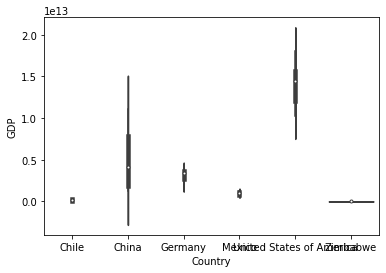

In [322]:
# So the data covers six countries (Chile, China, Germany, Mexico, US, Zimbabwe)  over a span of sixteen years (2000-2015). I will start by trying a Seaborn violin plot of the data as is to get a sense of whether an initial visualization is beneficial. This initial violine plot of GDP by country doesn't really help. It gives a rough sense of relative GDP's but not really the distribution or spread within each country. 

plt.subplot()
sns.violinplot(data=data, x='Country', y='GDP')
plt.show()

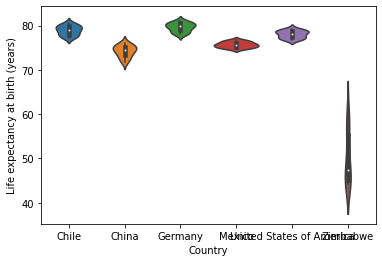

In [323]:
# The violine plot of Life Expectancy by Country is more useful, especailly for indicating two questions to explore: 1) why are Chile, China, Germany, Mexico, and the U.S. so similiar in LE while being so different in GDP, and 2) Is there a corresponding large change in Zimbabwe's GDP to go with the large change in LE?

plt.subplot()
sns.violinplot(data=data, x='Country', y='Life expectancy at birth (years)')
plt.show()

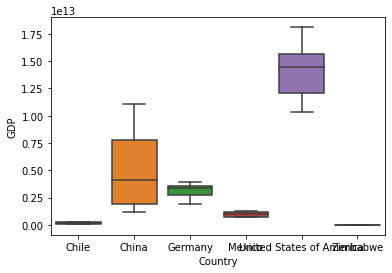

In [324]:
# To help get a better sense of the distribution of GDP for each country, I'm going to use a boxplot. If we had more datapoints or there was a bigger spread in the data, the violinplot might have been more helpful. As it is, the boxplots will show the quartiles, essentially making the spread more obvious. So we see that Zimbabwe and Chile had little change in GDP relative to the other countries and China had by far the most change in GDP with the U.S. second and Germany and Mexico third and fourth, respectively. This gives a clear sense of difference between the countries changes in GDP. 

# At this point, two issues stick out to me. 1) Although GDP and the change in GDP for each country is substantially different from the others being compared, those differences do not appear to correspond with flucutations or relative LE. That is, China's median GDP is higher and changed more than Germany's, but Germany has a higher LE. 2) Although Zimbabwe and Chile have similiar GDPs relative to the other countires, there LE's differ significantly. 

plt.subplot()
sns.boxplot(data=data, x='Country', y='GDP')
plt.show()

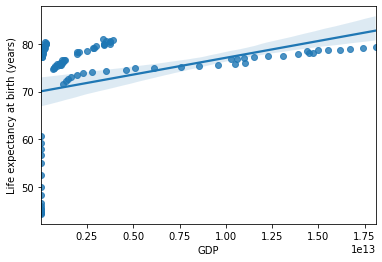

In [344]:
# OK, so I suspected that linear regresion plot wouldn't be too beneficial because there is too much data from too many places. It's actually a better fit than I anticipated; evidenced by the high degree of confidence visible in the shaded region. I would like a closer look at the data, because I think the small collection of datapoints of low GDP but high LE (which is mostly Chile) is balancing the low GDP and low LE numbers.

plt.subplot()
sns.regplot(data=data, x='GDP', y='Life expectancy at birth (years)')
plt.show()

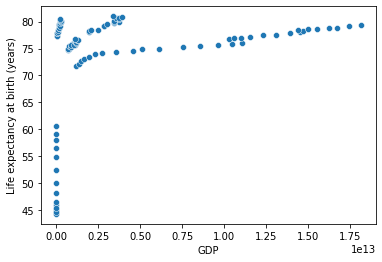

In [325]:
# OK, it looks like there are four clusters of data: 1) Low GDP with high LE, 2) Low GDP with low LE, 3) A long progression of greatly increasing GDP with slight gains in LE, 4) A small progression of slight gains in GDP with higher gains in LE. At this point, I want to take a closer look at each country individually. This will require grouping and slicing information by country, ordering by year, and then selecting the relevant columsn as a series. Because there are six countries, I will write a function that can be called to complete these steps rather than doing it individually for each country. This will also be helpful if I can get more data. 

plt.subplot()
sns.scatterplot(data=data, x='GDP', y='Life expectancy at birth (years)')
plt.show()

In [326]:
# I will start by graphing each countries GDP and life expectancy over the period of time of our data. I will start by isolating and graphing the data for Chile and then incorporate that code into a function that will take a country as an variable and create the graphs. I am going to start by doing this for Chile and then converting the code into the generic country and iterating through the list of countries. 

data_chile = data[data['Country'] == 'Chile'] 
#print(data_chile.head(2))
data_chile_le = data_chile['Life expectancy at birth (years)']
#print(data_chile_le)
data_chile_gdp = data_chile['GDP']
#print(data_chile_gdp)
x_axis_labels = data_chile['Year']
#print(x_axis_labels)

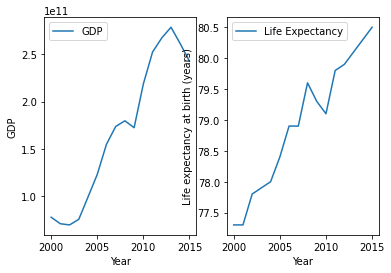

<Figure size 432x288 with 0 Axes>

In [327]:
# Now to take the data and produce two linegraphs that will visualize the relationshp between GDP and Life Expectancy.

ax = plt.subplot(1, 2, 1)
ax = sns.lineplot(x=x_axis_labels, y=data_chile_gdp)
ax = plt.legend(['GDP'])
ax_2 = plt.subplot(1, 2, 2)
ax_2 = sns.lineplot(x=x_axis_labels, y=data_chile_le)
ax_2 = plt.legend(['Life Expectancy'])
plt.show()
plt.clf()

In [328]:
# OK, now that I know the code works, I will use this to create a function that will produce similar graphs or each country. I will assume that the data has already been converted into a Pandas DataFrame. Ultimately, I also included two more graphs for each country. The third graph is a scatterplot with linear regression line of GDP vs LE. This will hopefully visualize any possible correlation between GDP and LE which appears to be the case from the initial graphs of GDP and LE over time. The fourth graph will compare the % change of GDP and the % change of LE. My thinking here is that this is a more focused examination on whether a positive or negative change in GDP has a positive or negative affect on LE. This final graph was slightly more complicated because I wasn't just selecting a column of information but needed to create new columns and then select information from two different rows to complete the calculation. 

def gdp_le_line_graphs(country, dataset):
    data_country = data[data['Country'] == country] 
    data_country_le = data_country['Life expectancy at birth (years)']
    data_country_gdp = data_country['GDP']
    data_country = data[data['Country'] == country] 
    country_gdp_lst = list(data_country['GDP'])
    country_fill_in_lst = []
    country_fill_in_2 = []
    for r in list(range(len(country_gdp_lst))):
        if r == 0:
            country_fill_in_lst.append(0)
        else:
            country_fill_in_lst.append(100 * ((country_gdp_lst[r] - country_gdp_lst[(r-1)])/country_gdp_lst[(r-1)]))
    
    data_country['% Change GDP from Previous Year'] = country_fill_in_lst

    country_le_lst = list(data_country['Life expectancy at birth (years)'])

    for r in list(range(len(country_le_lst))): #Using the range function was useful for iterating through the list, especially since I had to essentially skip the first year since I did not have the necessary information to determine the change in GDP or LE for the first year of the dataset.
        if r == 0:
            country_fill_in_2.append(0)
        else:
            country_fill_in_2.append(100 * ((country_le_lst[r] - country_le_lst[(r-1)])/country_le_lst[(r-1)]))

    data_country['% Change LE from Previous Year'] = country_fill_in_2

    plt.figure(figsize=(20,15))
    x_axis_labels = data_country['Year']
    ax = plt.subplot(2, 2, 1)
    ax = sns.lineplot(x=x_axis_labels, y=data_country_gdp)
    #ax = plt.legend(['GDP'])
    plt.tight_layout()
    plt.title('GDP of ' + country)
    ax_2 = plt.subplot(2, 2, 2)
    ax_2 = sns.lineplot(x=x_axis_labels, y=data_country_le)
    #ax_2 = plt.legend(['Life Expectancy'])
    plt.title('LE of ' + country)
    plt.tight_layout()
    ax_3 = plt.subplot(2, 2, 3)
    ax_3 = sns.regplot(data=dataset, x=data_country_gdp, y=data_country_le)
    plt.tight_layout()
    ax_4 = plt.subplot(2, 2, 4)
    ax_4 = sns.regplot(x=(country_fill_in_lst), y=(country_fill_in_2))
    ax_4 = plt.xlabel('% Change in GDP from Previous Year')
    ax_4 = plt.ylabel('% Change in LE from Previous Year')
    plt.show()
    plt.clf()



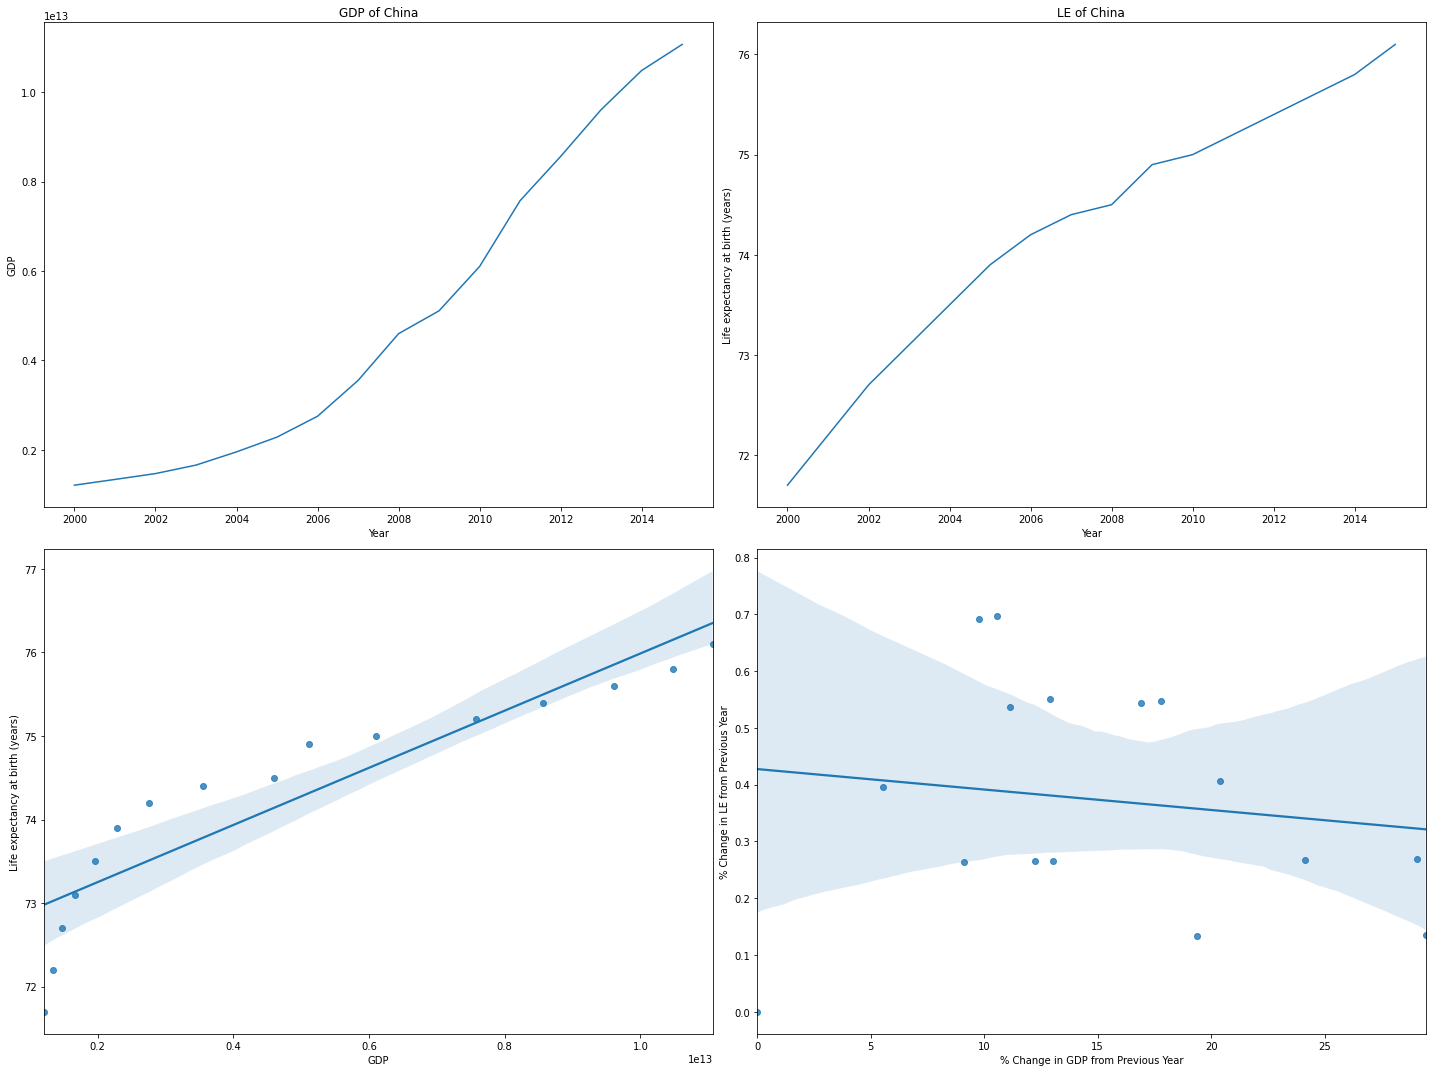

<Figure size 432x288 with 0 Axes>

In [329]:
gdp_le_line_graphs('China', data)

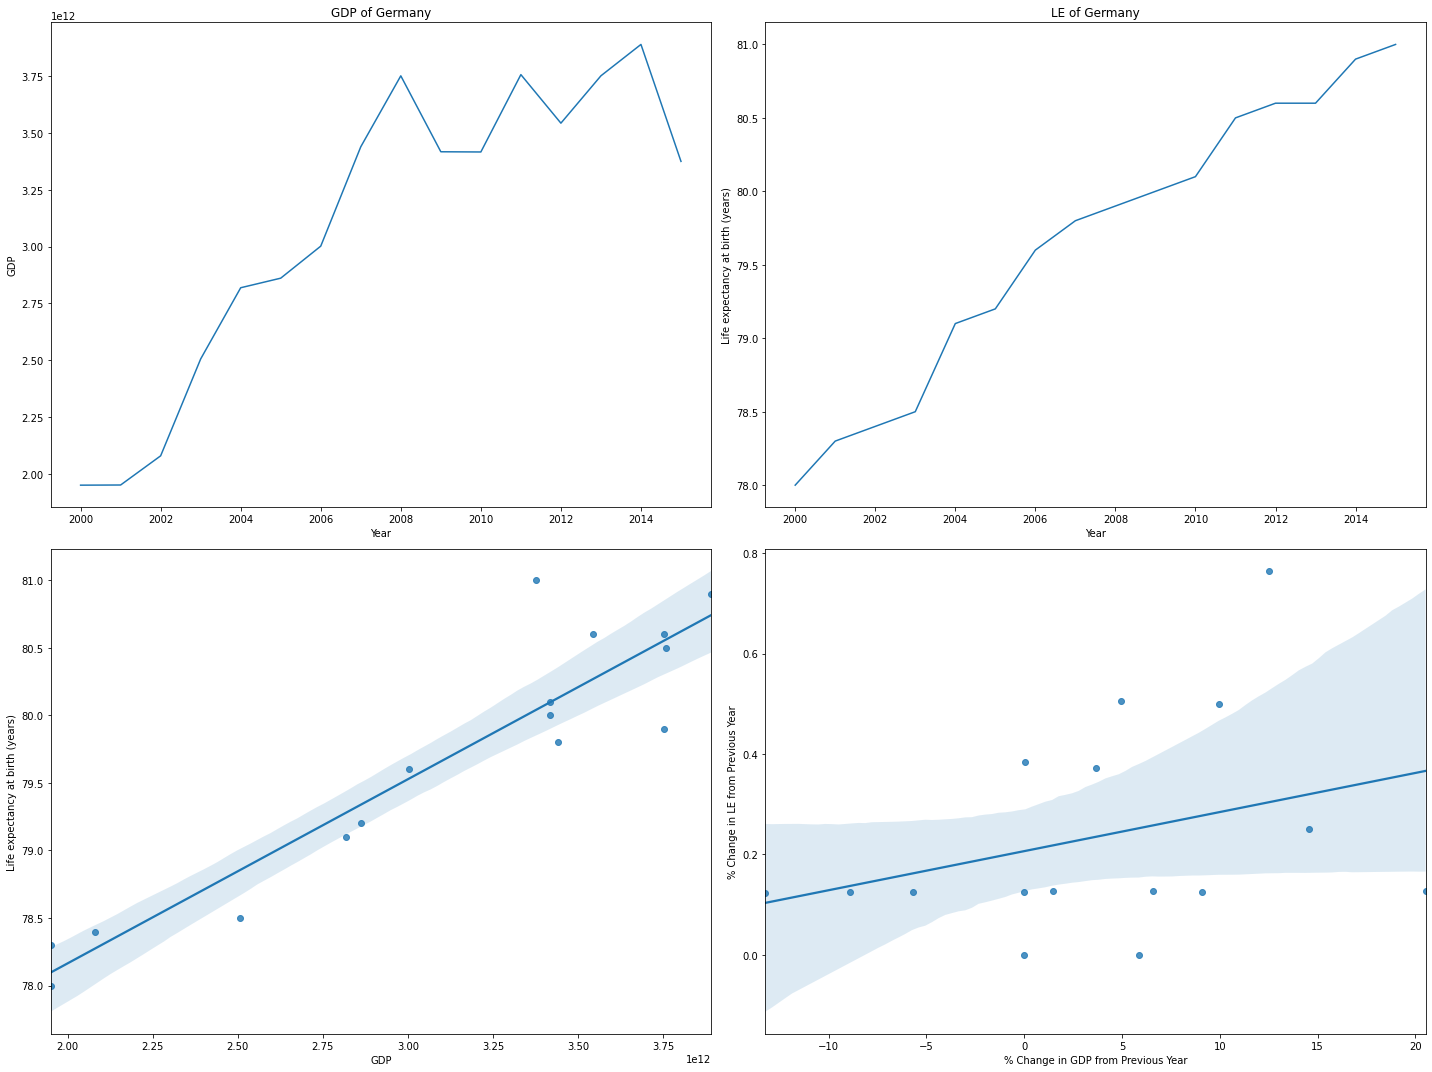

<Figure size 432x288 with 0 Axes>

In [330]:
gdp_le_line_graphs('Germany', data)

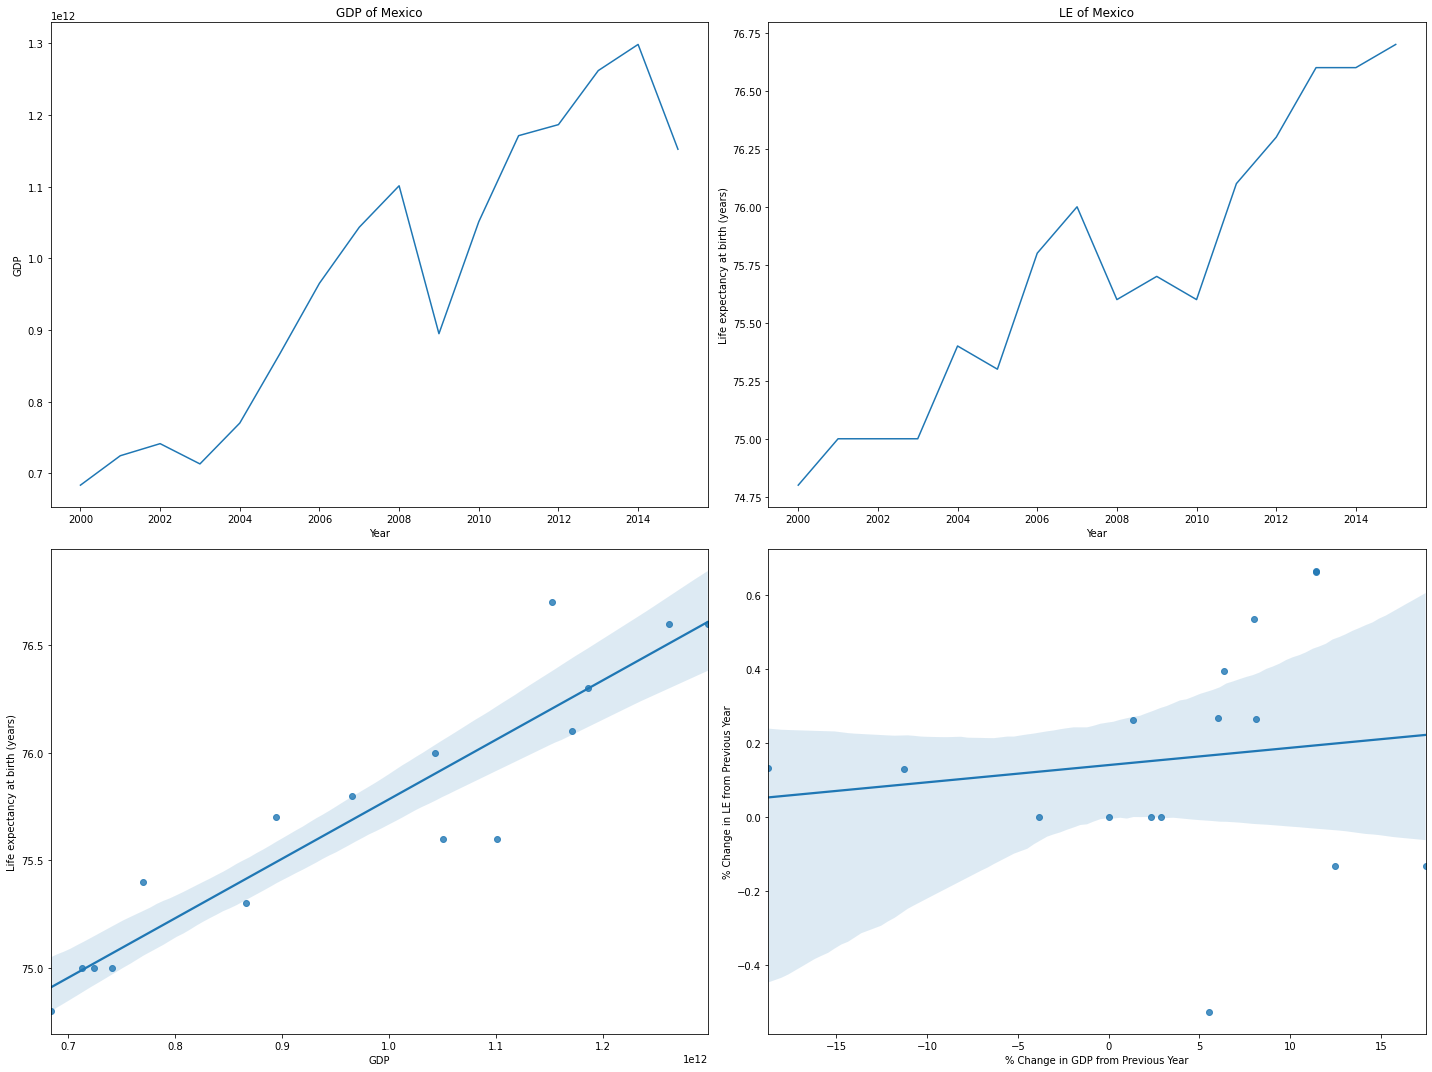

<Figure size 432x288 with 0 Axes>

In [331]:
gdp_le_line_graphs('Mexico', data)

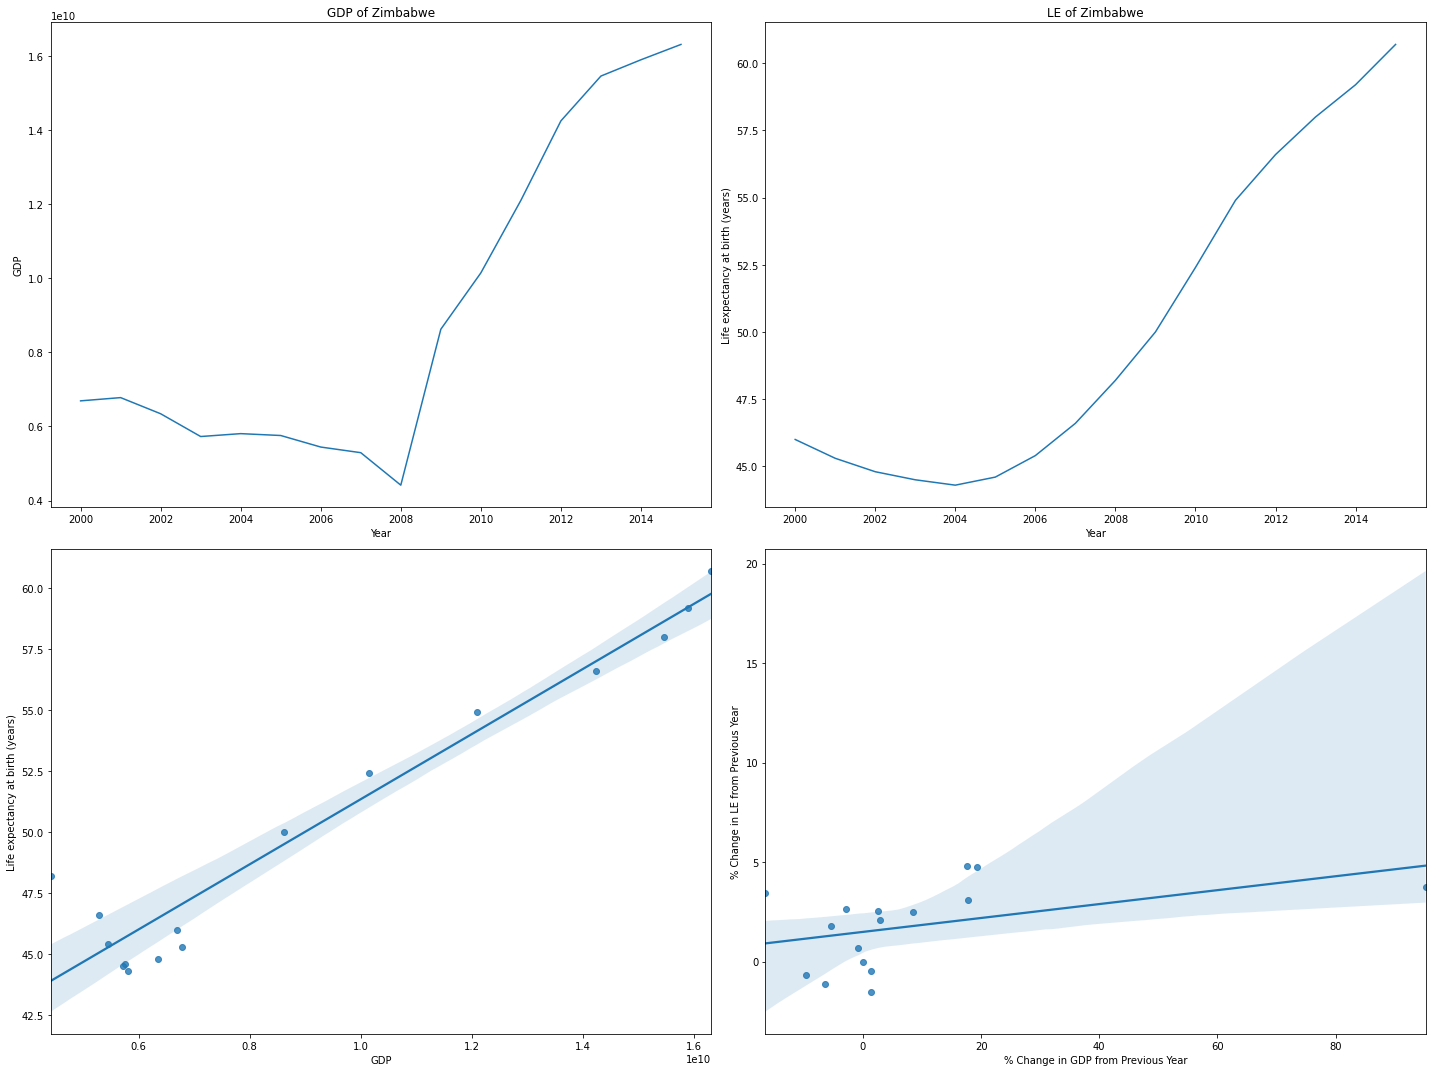

<Figure size 432x288 with 0 Axes>

In [332]:
gdp_le_line_graphs('Zimbabwe', data)

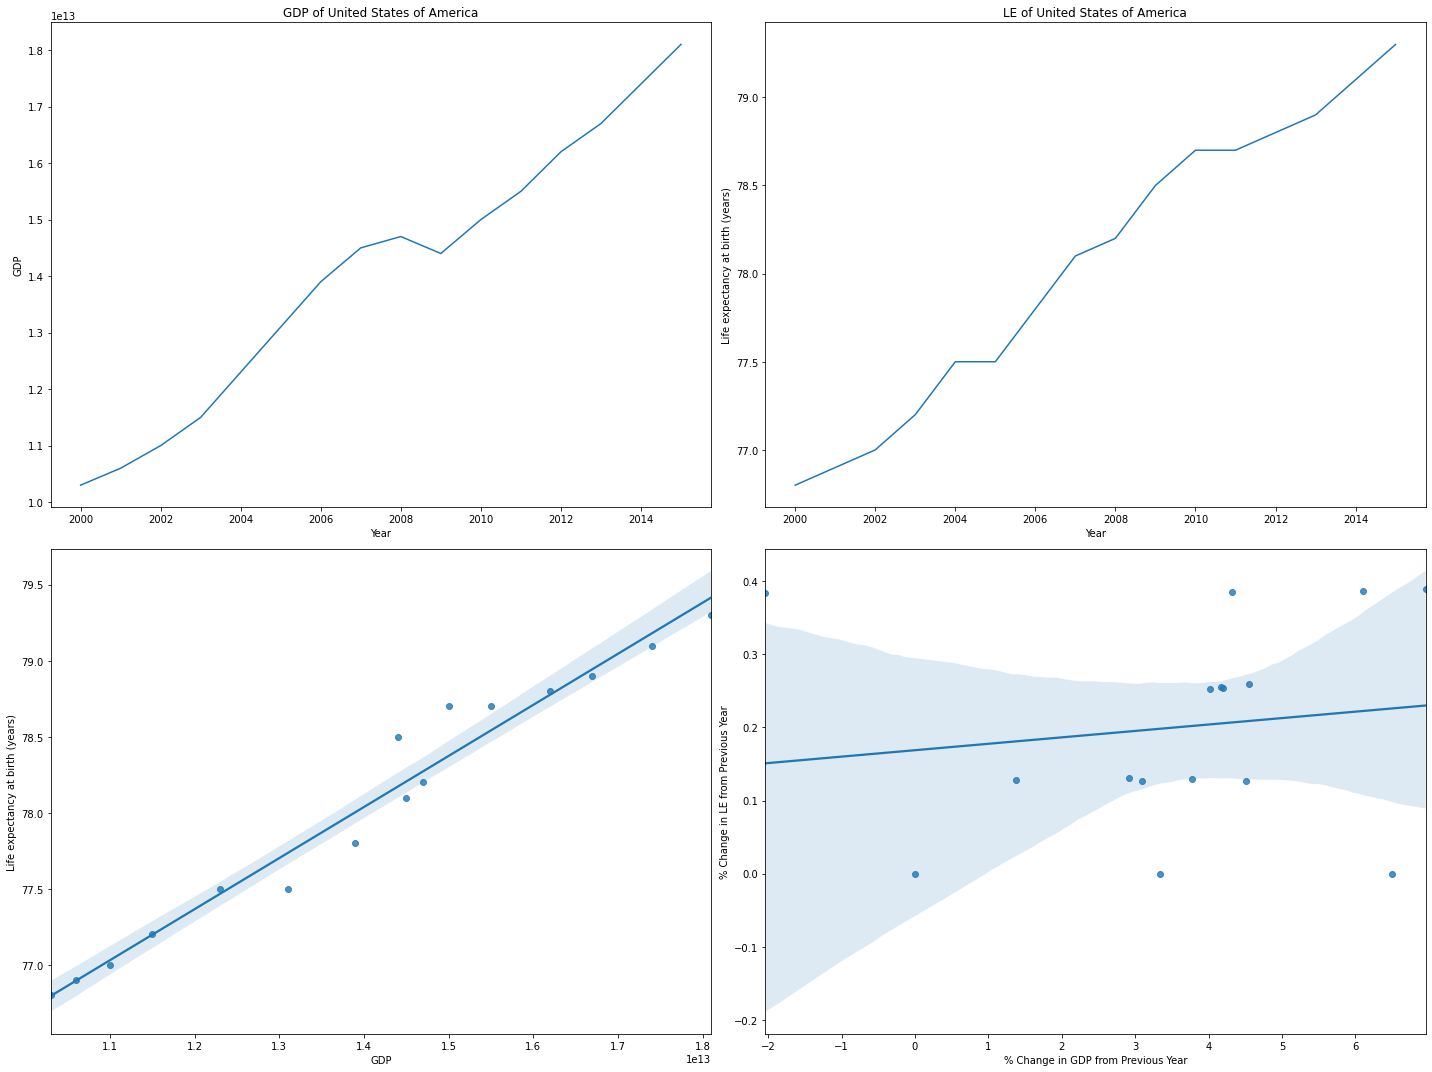

<Figure size 432x288 with 0 Axes>

In [333]:
gdp_le_line_graphs('United States of America', data)

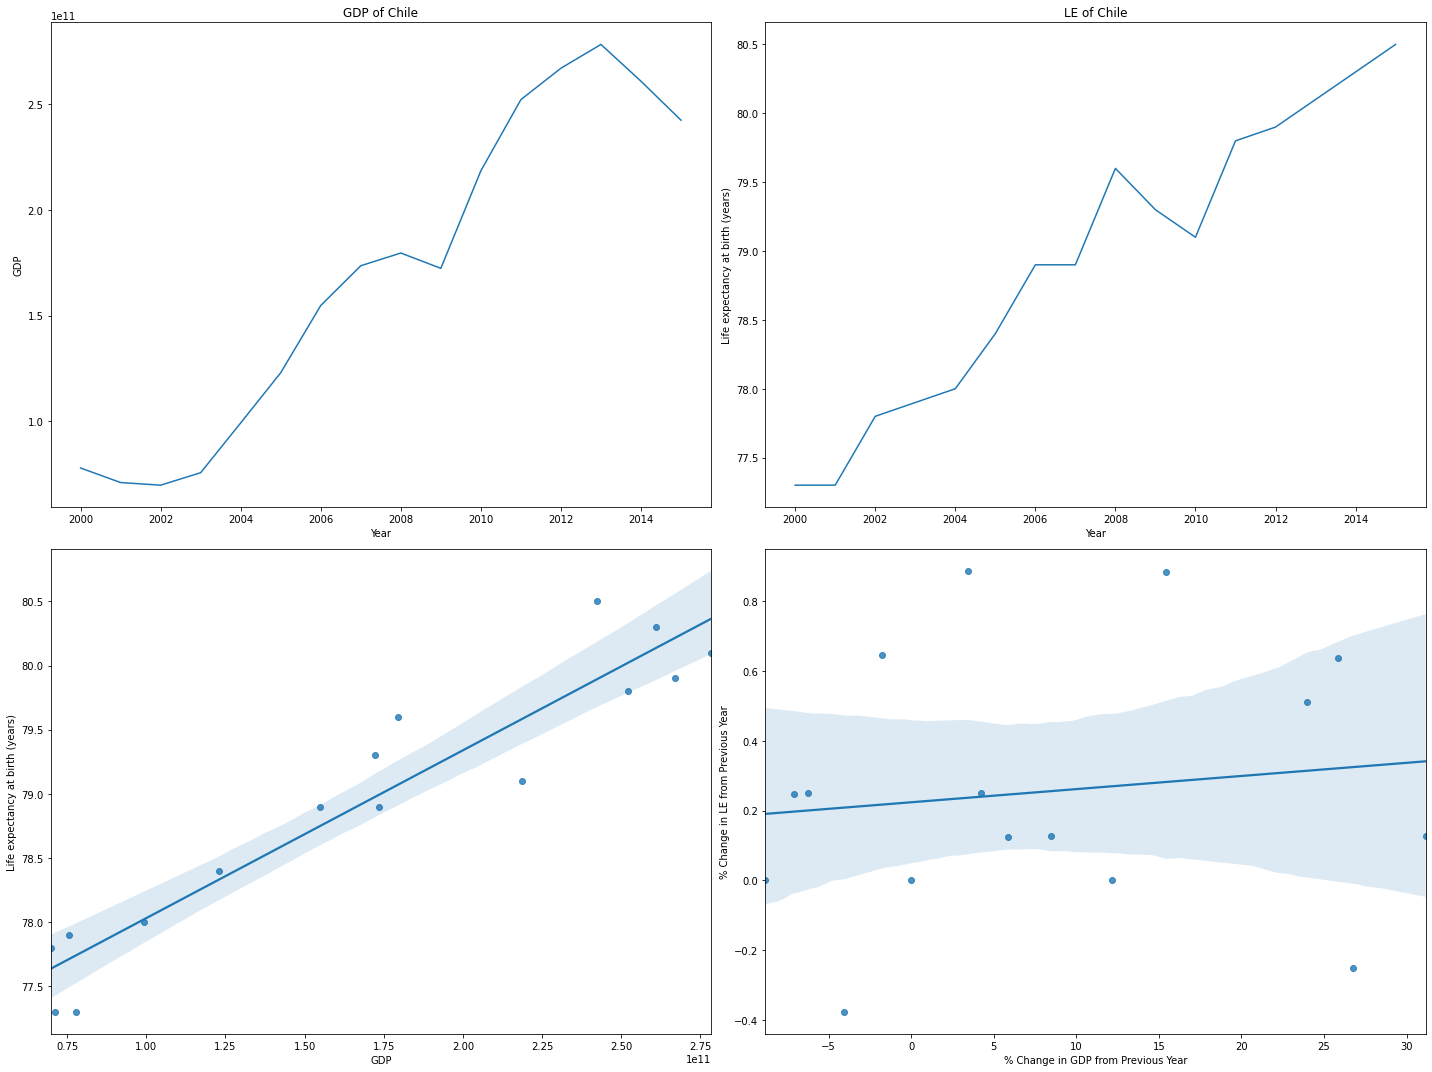

<Figure size 432x288 with 0 Axes>

In [334]:
gdp_le_line_graphs('Chile', data)

In [335]:
# OK, with the graphs of each country completed, it looks like the relationship between GDP and LE is more localized rather than universal. That is, a specific trend in GDP will have a correlative affect of LE within a particular country, but larger vs. smaller GDP between countires cannot be used to predice the average LE in the country compared to other countries. Overall, it looks like LE is affected by GDP but that there are enough other factors to prevent using GDP alone to predice LE.  

# There main support for this comes from relative confidence of each linear regression line in the GDP vs LE graph for each country and the fact that Chile and Zimbabwe have similar GDPs but such different LEs and Chine has such a high GDP without correspondingly high LE. 

# In moving forward, I want to take a closer look at Chile and Zimbabwe relative to each other to see if there is anything significant.

data_zim = data[data['Country'] == 'Zimbabwe'] 
#print(data_zim.head(2))
data_zim_le = data_zim['Life expectancy at birth (years)']
#print(data_zim_le)
data_zim_gdp = data_zim['GDP']
#print(data_zim_gdp)
x_axis_labels = data_zim['Year']
print(x_axis_labels)

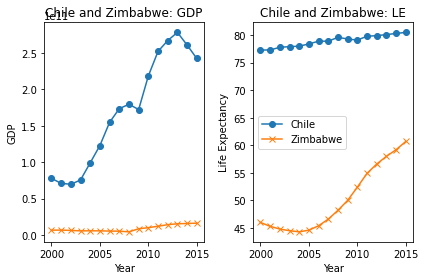

<Figure size 432x288 with 0 Axes>

In [336]:
# By plotting the GDP of both countires on one graph and the LE of both on the other, it appears that the relative correlation of GDP and LE is confirmed even though the degree of that correlation is not universial. You can see this in the fact that both countries have net positive increases in GDP and LE. However, Chile's GDP has a greater increase with little change in LE while Zimbabwe has a slight gain in GDP but significantly larger gains in LE. 

ax = plt.subplot(1, 2, 1)
ax = plt.plot(x_axis_labels, data_chile_gdp, marker='o')
ax = plt.plot(x_axis_labels, data_zim_gdp, marker='x')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.tight_layout()
plt.title('Chile and Zimbabwe: GDP')
ax_2 = plt.subplot(1, 2, 2)
ax_2 = plt.plot(x_axis_labels, data_chile_le, marker='o')
ax_2 = plt.plot(x_axis_labels, data_zim_le, marker='x')
plt.legend(['Chile', 'Zimbabwe'])
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Chile and Zimbabwe: LE')
plt.tight_layout()
plt.show()
plt.clf()

In [337]:
# The following code were the initial work for the scatterplot and linear regression graphs of % change.

#print(data.head(20))
data_chile['% Change GDP from Previous Year'] = 'fill in'
print(data_chile.head(20))
chile_gdp_lst = list(data_chile['GDP'])
print(chile_gdp_lst)
chile_fill_in_lst = []

for r in list(range(len(chile_gdp_lst))):
    if r == 0:
        chile_fill_in_lst.append(0)
    else:
        chile_fill_in_lst.append(100 * ((chile_gdp_lst[r] - chile_gdp_lst[(r-1)])/chile_gdp_lst[(r-1)]))
   


print(chile_fill_in_lst)
print(list(range(1, (len(chile_gdp_lst) - 1))))
data_chile['% Change GDP from Previous Year'] = chile_fill_in_lst
print(data_chile)

   Country  Year  Life expectancy at birth (years)           GDP  \
0    Chile  2000                              77.3  7.786093e+10   
1    Chile  2001                              77.3  7.097992e+10   
2    Chile  2002                              77.8  6.973681e+10   
3    Chile  2003                              77.9  7.564346e+10   
4    Chile  2004                              78.0  9.921039e+10   
5    Chile  2005                              78.4  1.229650e+11   
6    Chile  2006                              78.9  1.547880e+11   
7    Chile  2007                              78.9  1.736060e+11   
8    Chile  2008                              79.6  1.796380e+11   
9    Chile  2009                              79.3  1.723890e+11   
10   Chile  2010                              79.1  2.185380e+11   
11   Chile  2011                              79.8  2.522520e+11   
12   Chile  2012                              79.9  2.671220e+11   
13   Chile  2013                              80

In [338]:
data_chile['% Change LE from Previous Year'] = 'fill in 2'
print(data_chile.head())
chile_fill_in_2 = []


chile_le_lst = list(data_chile['Life expectancy at birth (years)'])
print(chile_le_lst)

for r in list(range(len(chile_le_lst))):
    if r == 0:
        chile_fill_in_2.append(0)
    else:
        chile_fill_in_2.append(100 * ((chile_le_lst[r] - chile_le_lst[(r-1)])/chile_le_lst[(r-1)]))
   


print(chile_fill_in_2)
data_chile['% Change LE from Previous Year'] = chile_fill_in_2
print(data_chile)

  Country  Year  Life expectancy at birth (years)           GDP  \
0   Chile  2000                              77.3  7.786093e+10   
1   Chile  2001                              77.3  7.097992e+10   
2   Chile  2002                              77.8  6.973681e+10   
3   Chile  2003                              77.9  7.564346e+10   
4   Chile  2004                              78.0  9.921039e+10   

   % Change GDP from Previous Year % Change LE from Previous Year  
0                         0.000000                      fill in 2  
1                        -8.837562                      fill in 2  
2                        -1.751358                      fill in 2  
3                         8.469915                      fill in 2  
4                        31.155282                      fill in 2  
[77.3, 77.3, 77.8, 77.9, 78.0, 78.4, 78.9, 78.9, 79.6, 79.3, 79.1, 79.8, 79.9, 80.1, 80.3, 80.5]
[0, 0.0, 0.646830530401035, 0.1285347043701909, 0.12836970474967177, 0.5128205128205201, 0.6

<class 'pandas.core.series.Series'>


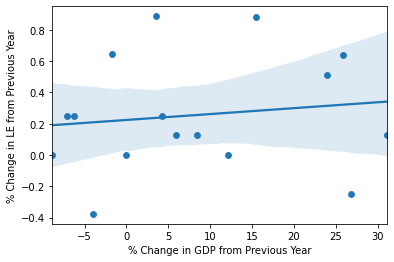

In [339]:
plt.subplot()
sns.scatterplot(x=(chile_fill_in_lst), y=(chile_fill_in_2))
sns.regplot(x=chile_fill_in_lst, y=chile_fill_in_2)
plt.xlabel('% Change in GDP from Previous Year')
plt.ylabel('% Change in LE from Previous Year')
plt.show()

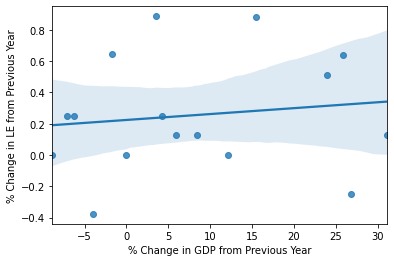

In [340]:
plt.subplot()
sns.regplot(x=chile_fill_in_lst, y=chile_fill_in_2)
plt.xlabel('% Change in GDP from Previous Year')
plt.ylabel('% Change in LE from Previous Year')
plt.show()

In [341]:
# code for the function that will automatically make the scatterplot as the fourth graph in the list
data_country = data[data['Country'] == country] 
country_gdp_lst = list(data_country['GDP'])
country_fill_in_lst = []
country_fill_in_2 = []
for r in list(range(len(country_gdp_lst))):
    if r == 0:
        country_fill_in_lst.append(0)
    else:
        country_fill_in_lst.append(100 * ((country_gdp_lst[r] - country_gdp_lst[(r-1)])/country_gdp_lst[(r-1)]))
   
data_country['% Change GDP from Previous Year'] = country_fill_in_lst

country_le_lst = list(data_country['Life expectancy at birth (years)'])

for r in list(range(len(country_le_lst))):
    if r == 0:
        country_fill_in_2.append(0)
    else:
        country_fill_in_2.append(100 * ((country_le_lst[r] - country_le_lst[(r-1)])/country_le_lst[(r-1)]))

data_country['% Change LE from Previous Year'] = country_fill_in_2

plt.subplot()
sns.scatterplot(x=(country_fill_in_lst), y=(country_fill_in_2))
plt.xlabel('% Change in GDP from Previous Year')
plt.ylabel('% Change in LE from Previous Year')
plt.show()

NameError: name 'country' is not defined

In [287]:
def country_scatter(country, dataset):
    data_country = data[data['Country'] == country] 
    country_gdp_lst = list(data_country['GDP'])
    country_fill_in_lst = []
    country_fill_in_2 = []
    for r in list(range(len(country_gdp_lst))):
        if r == 0:
            country_fill_in_lst.append(0)
        else:
            country_fill_in_lst.append(100 * ((country_gdp_lst[r] - country_gdp_lst[(r-1)])/country_gdp_lst[(r-1)]))
    
    data_country['% Change GDP from Previous Year'] = country_fill_in_lst

    country_le_lst = list(data_country['Life expectancy at birth (years)'])

    for r in list(range(len(country_le_lst))):
        if r == 0:
            country_fill_in_2.append(0)
        else:
            country_fill_in_2.append(100 * ((country_le_lst[r] - country_le_lst[(r-1)])/country_le_lst[(r-1)]))

    data_country['% Change LE from Previous Year'] = country_fill_in_2

    plt.subplot()
    sns.scatterplot(x=(country_fill_in_lst), y=(country_fill_in_2))
    plt.xlabel('% Change in GDP from Previous Year')
    plt.ylabel('% Change in LE from Previous Year')
    plt.show()

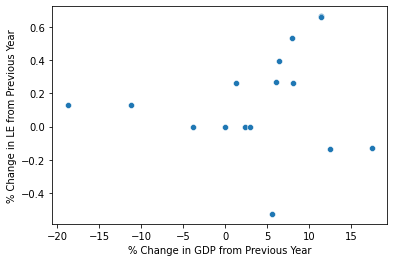

In [288]:
country_scatter('Mexico', data)